In [2]:
#We import the libraries we need in order to see and analize out data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [3]:
#We use pandas to read the csv file in our folder
df=pd.read_csv("911.csv")

In [4]:
#We display the head of our table to get an ideea of how the data is stored
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#We start asking basic questions like:

In [6]:
#Top five zipcodes for 911 calls
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
#How many unique title codes there are:
len(df['title'].unique())

110

In [8]:
#What the top 5 townships for 911 calls are
df["twp"].value_counts()[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
'''
We can also use Pyton to do more complex tasks, for example, we have
"Reasons/Departments" specified in the title code, These are EMS, Fire,
and Traffic, we can use .apply() combined with a lambda function to create
a new column called "Reason" that contains one of those values as strings
'''

df["Reason"]=df["title"].apply(lambda x:x.split(':')[0])

'''
We use .split(':') to create a list because the terms we need are separated 
by ":" in the 'title' column and this will make it easy for us to grab our
string using slicing notation
'''

'\nWe use .split(\':\') to create a list because the terms we need are separated \nby ":" in the \'title\' column and this will make it easy for us to grab our\nstring using slicing notation\n'

In [10]:
df.head()
# We check to see if our column was created successfuly

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [11]:
'''
Based of this new column, we can now anser more questions, like what is the most
common reason for a 911 call
'''
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

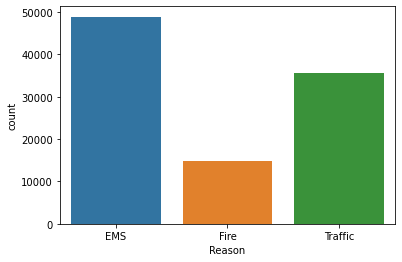

In [12]:
'''
We can make the last question's answer easier to read and understand by using a 
countplot
'''
countplot2= sns.countplot(x=df["Reason"])
fig2=countplot2.get_figure()
fig2.savefig('countplot2.png')

In [13]:
'''
We can further explore the data by separating the description of the call incident
the same way we separated the  Reason
'''
df['Description']=df['title'].apply(lambda x:x.split(':')[1])

In [14]:
#we can now see the top 10 descriptions for 911 calls
df['Description'].value_counts()[:10]

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
 FALL VICTIM               4863
 ROAD OBSTRUCTION -        3144
 SUBJECT IN PAIN           2687
 HEAD INJURY               2631
Name: Description, dtype: int64

In [15]:
'''
As we can see, some of the description have dashes that we do not want in our visualisations
furthermore, they could interfere wih the real count of a certain description, so we write
a quick function to delete the dashes from our 'Description' column
'''

'''
The Function takes in one string, checks if there are any dashes in there, deletes them
and returns back the string without them
'''
def get_unwanted(string):
    letters=list(string)
    for item in letters:
        if item=='-':
            letters.pop(letters.index(item))
        else:
            pass
    return ''.join(letters)

In [16]:
'''
We use the function with .apply and a lambda function to clean up our column
'''
df['Description']=df['Description'].apply(lambda x:get_unwanted(x))

'''
We check afterwards to see if we got the desired result
'''
df['Description'].value_counts()[:10]

 VEHICLE ACCIDENT         23066
 DISABLED VEHICLE          7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
 FALL VICTIM               4863
 ROAD OBSTRUCTION          3144
 SUBJECT IN PAIN           2687
 HEAD INJURY               2631
Name: Description, dtype: int64

In [17]:

'''
as we can see, out data is still not clean enough as we have 2 value counts
for vehicle accident, so we write a function that checks for spaces and other
non alpha numeric characters at the end or at the begining of strings and deletes them
'''

'\nas we can see, out data is still not clean enough as we have 2 value counts\nfor vehicle accident, so we write a function that checks for spaces and other\nnon alpha numeric characters at the end or at the begining of strings and deletes them\n'

In [18]:
def delete_non_alpha(string):
    letters2=list(string)
    for n in range(0,len(letters2)):
        if not letters2[-1].isalpha():
            letters2.pop(-1)
        elif not letters2[0].isalpha():
            letters2.pop(0)
        else:
            pass
    return ''.join(letters2)

In [19]:
'''
we will now overwrite the Description column using this function
'''

'\nwe will now overwrite the Description column using this function\n'

In [20]:
df["Description"]=df["Description"].apply(lambda x:delete_non_alpha(x))

In [21]:
'''
We can now use this column to see how many unique descriptions were given for 911 calls
'''
len(df['Description'].unique())

76

In [22]:
'''
Also, if we want to, we can se the most rare descriptions for 911 calls
'''
df["Description"].value_counts()[-10:].sort_values()

BOMB DEVICE FOUND      1
WARRANT SERVICE        2
PLANE CRASH            2
ELECTROCUTION          2
ACTIVE SHOOTER         2
POLICE INFORMATION     2
SUSPICIOUS             2
INDUSTRIAL ACCIDENT    3
DROWNING               4
TRAIN CRASH            8
Name: Description, dtype: int64

In [23]:

#We create a new dataframe to display the top 10 most common descriptions of 911 calls
newdf=pd.DataFrame(df['Description'].value_counts()[:10])

#We add a new column to the data frame representing the %of calls the specific description represents from total calls
newdf["percent/total"]=newdf['Description'].apply(lambda x:x/(len(df["Reason"]))*100).round(2)
newdf['percent/total']=newdf['percent/total'].apply(lambda x:str(x)+'% of total calls')

#We create a new Rankking column
newdf["Ranking"]=[n+1 for n in range(0,len(newdf["percent/total"]))]

#We rearange  the columns
newdf=newdf[['Ranking',"Description",'percent/total']]

#We rename "Description" to "Number of calls and rearange again"
newdf["Number of Calls"]=newdf["Description"]
newdf.drop(columns="Description",inplace=True)
newdf=newdf[['Ranking',"Number of Calls",'percent/total']]

#We export the dataframe as a csv file
newdf.to_csv("topCommonDescriptions.csv")

In [24]:

# We do the same thing for a second dataframe representing the op 10 most uncommon descriptions of 911 calls
newdf2=pd.DataFrame(df["Description"].value_counts()[-10:].sort_values())
newdf2["percent/total"]=newdf2['Description'].apply(lambda x:x/(len(df["Reason"]))*100).round(3)
newdf2['percent/total']=newdf2['percent/total'].apply(lambda x:str(x)+'% of total calls')
newdf2["Ranking"]=[n+1 for n in range(0,len(newdf2["percent/total"]))]
newdf2=newdf2[['Ranking',"Description",'percent/total']]
newdf2["Number of Calls"]=newdf2["Description"]
newdf2.drop(columns="Description",inplace=True)
newdf2=newdf2[['Ranking',"Number of Calls",'percent/total']]
newdf2.to_csv("topUncommonDescriptions.csv")

In [25]:
'''
Going forward we will be focusing a bit more on time information.
First we check the datatype of our 'timeStamp' column
'''
type(df['timeStamp'][0])

str

In [26]:
'''
seeing as the data in the 'tipeStamp' column are strings, we will use pd.to_datetime
to convert it into a datetime object
'''
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [27]:
'''
We will now make it even easier to analize data based on datetime by creating
3 new columns, each for time, day of the week and month
'''

'''
We create a new 'Hour' column by using a lambda function that takes each item
from the 'timeStamp' column and returs it's .time attribute
'''
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

'''
We do the same thing for our next 2 columns, grabbing .month and .dayofweek
'''

df['Month']=df["timeStamp"].apply(lambda x:x.month)
df["DayOfWeek"]=df["timeStamp"].apply(lambda x:x.dayofweek)

In [28]:
#We check the new columns we created
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GASODOR/LEAK,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,3


In [29]:
'''
We notice that the day of the week is represented as an integer
'''
df['DayOfWeek'].value_counts()

'''
in order to make the column more easily readable and understandable we will
use .map() in order to transform the integers in strings representing the days
of the week
'''

#We create a dictionary containing the items we want to map
dmap={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
#We use the .map() function and the dictionary we created to change the column values
df["DayOfWeek"]=df['DayOfWeek'].map(dmap)

In [30]:
'''
if we use .head() on or data frame now, we hould see the day of the week changing
from integers to strings
'''
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GASODOR/LEAK,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,Thursday


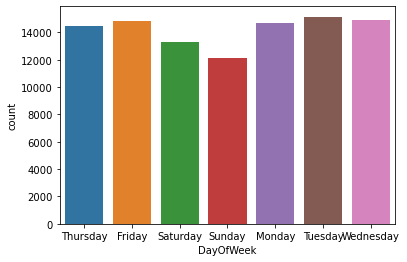

In [31]:
'''
Having this data in our table we can now visualise things like the number of 911
calls based on the day of the week
'''
countplot1 = sns.countplot(x=df['DayOfWeek'])
fig= countplot1.get_figure()
fig.savefig('countplot1.png')

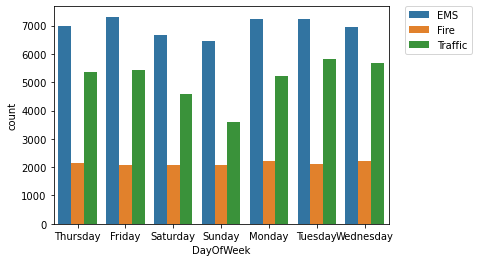

In [32]:
'''
For even more information, we can add a hue to our plot to see the number of calls
based on the day of the week by reason
'''
countplot3 = sns.countplot(x=df["DayOfWeek"],hue=df['Reason'])

#We use this to relocate the legend of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig3 = countplot3.get_figure()
fig3.savefig("Countplot3.png")

<AxesSubplot:xlabel='Month', ylabel='count'>

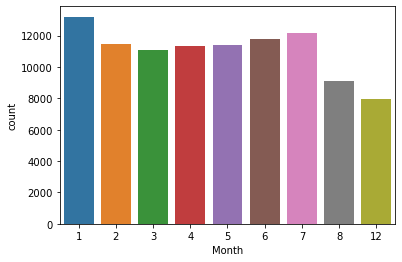

In [33]:
'''
We can do the same visualisation based on month
'''
sns.countplot(data=df,x="Month",)

In [34]:
'''
The data we are working with is missing a few months, so the countplot may
not be the best to visualise data based on month, we can wor with pands to
show a simple line plot which will fill in the missing months
'''

'''0
in order to do this, we create a 'byMonth' dataframe where we group the original
daatframe by the months, we use count() to aggregate the data
'''
byMonth=df.groupby(by='Month').count()

In [35]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Hour,DayOfWeek
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


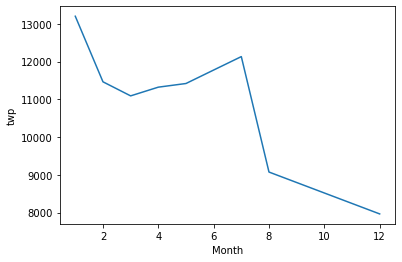

In [36]:
'''
Having this new dataframe we can now create the line plot
'''
ax = sns.lineplot(data=byMonth['twp'],)

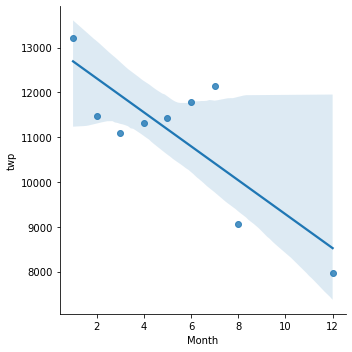

In [37]:
'''
We can alson use Seaborn to create a linear fit based on the number of calls
per month
'''
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [38]:
'''
Returning to our date related data, we create a new "Date" column which will
help us create some more plots
'''
df["Date"]=df["timeStamp"].apply(lambda x:x.date())

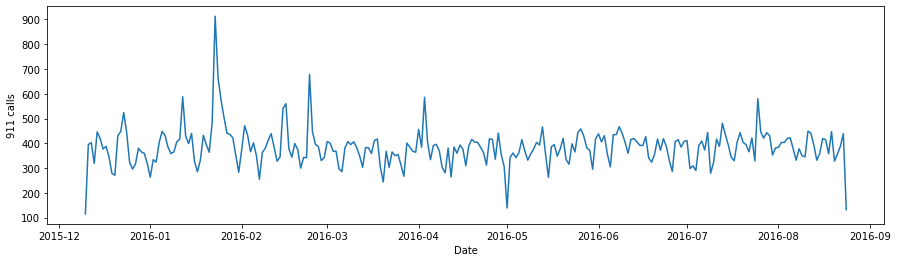

In [39]:
'''
We can use the new date column to properly chart the number of calls based on time
using a combination of .groupbby() and .plot()
'''
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel("911 calls")
lineplot1=df.groupby("Date").count()['twp'].plot()
fig4=lineplot1.get_figure()
fig4.savefig("911callsByMonth.png")

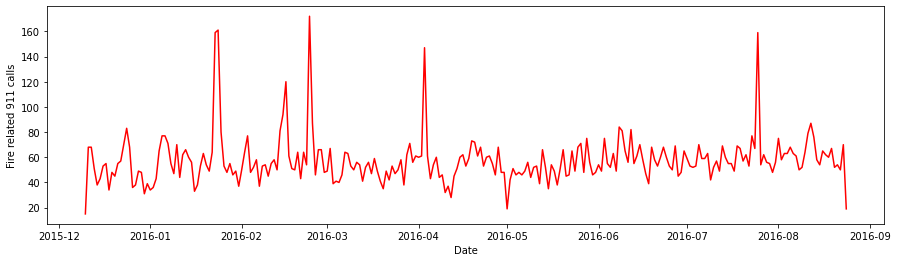

In [40]:
'''
we can go further with this graph by making it only show calls for a specific reason
(EMS, Fire, or Traffic)
'''
plt.figure(figsize=(15,4))
plt.ylabel("Fire related 911 calls")
lineplot2=df[df['Reason']=='Fire'].groupby("Date").count()['twp'].plot(c='r')
fig5=lineplot2.get_figure()
fig5.savefig("911callsByMonthFire.png")

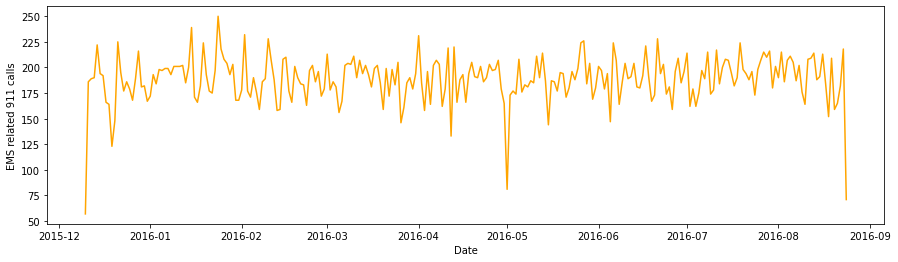

In [41]:
plt.figure(figsize=(15,4))
plt.ylabel('EMS related 911 calls')
lineplot3=df[df['Reason']=='EMS'].groupby("Date").count()['twp'].plot(c='orange')
fig6=lineplot3.get_figure()
fig6.savefig("911callsByMonthEMS.png")

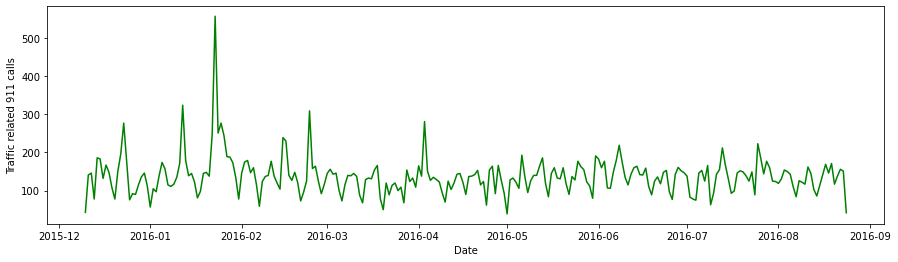

In [42]:
plt.figure(figsize=(15,4))
plt.ylabel("Traffic related 911 calls")
lineplot4=df[df['Reason']=='Traffic'].groupby("Date").count()['twp'].plot(c='g')
fig7=lineplot4.get_figure()
fig7.savefig("911callsByMonthTraffic.png")

In [43]:
'''
Moving on, we will create a heatmap to make it easy to visualise calls across
months and days of the week

The first step is reshaping our dataframe, to do that we'll use .pivot_table()
to create a pivot table with the data we want to chart
'''

rsdf=df[['Hour','DayOfWeek','Reason']].pivot_table(values='Reason',index="DayOfWeek",columns='Hour',aggfunc='count')

In [44]:
rsdf

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [45]:
'''
Having created our pivot table we can now use Seaborn to display a heatmap of 911
calls based on Hour/Day of the week
'''

'\nHaving created our pivot table we can now use Seaborn to display a heatmap of 911\ncalls based on Hour/Day of the week\n'

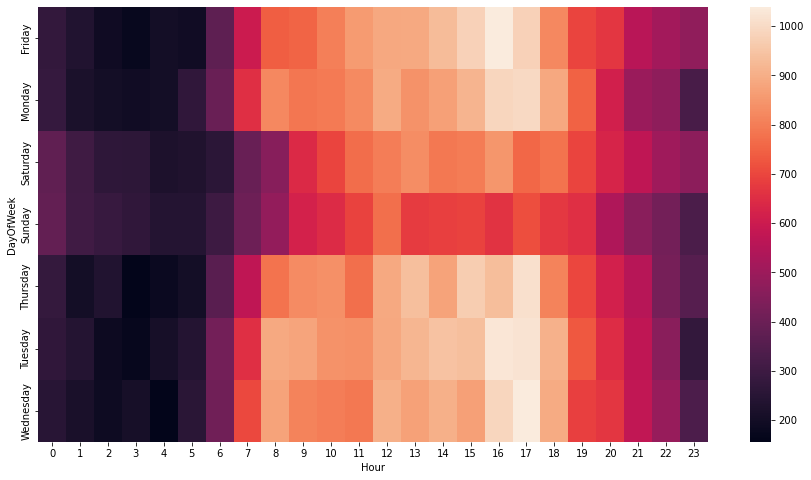

In [46]:
plt.figure(figsize=(15,8))
heatmap1=sns.heatmap(rsdf)
fig8=heatmap1.get_figure()
fig8.savefig("heatmap1.png")

In [47]:
'''
The Heatmap makes it easy to observe concentration of phone in certain hours based on
the day of the week

We can do the same thing using months as the columns for our pivot table
'''
rsdf2=df[['Month','DayOfWeek','Reason']].pivot_table(values='Reason',index="DayOfWeek",columns='Month',aggfunc='count')

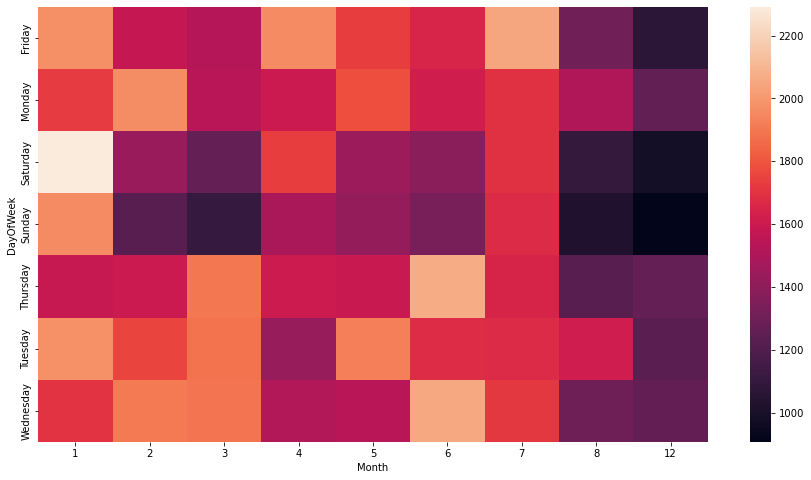

In [48]:
plt.figure(figsize=(15,8))
heatmap2=sns.heatmap(rsdf2)
fig9=heatmap2.get_figure()
fig9.savefig("heatmap2.png")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Description  99492 non-null  object        
 11  Hour         99492 non-null  int64         
 12  Month        99492 non-null  int64         
 13  DayOfWeek    99492 non-null  object        
 14  Date         99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)